In [80]:
from PIL import Image 
import cv2
import pytesseract
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
import numpy as np

In [81]:
im_file = "C:/Users/RECAM/ASH - St Johns Mosaic Lease - 09142021 (signed)_Page_01.jpg"
im = Image.open(im_file)

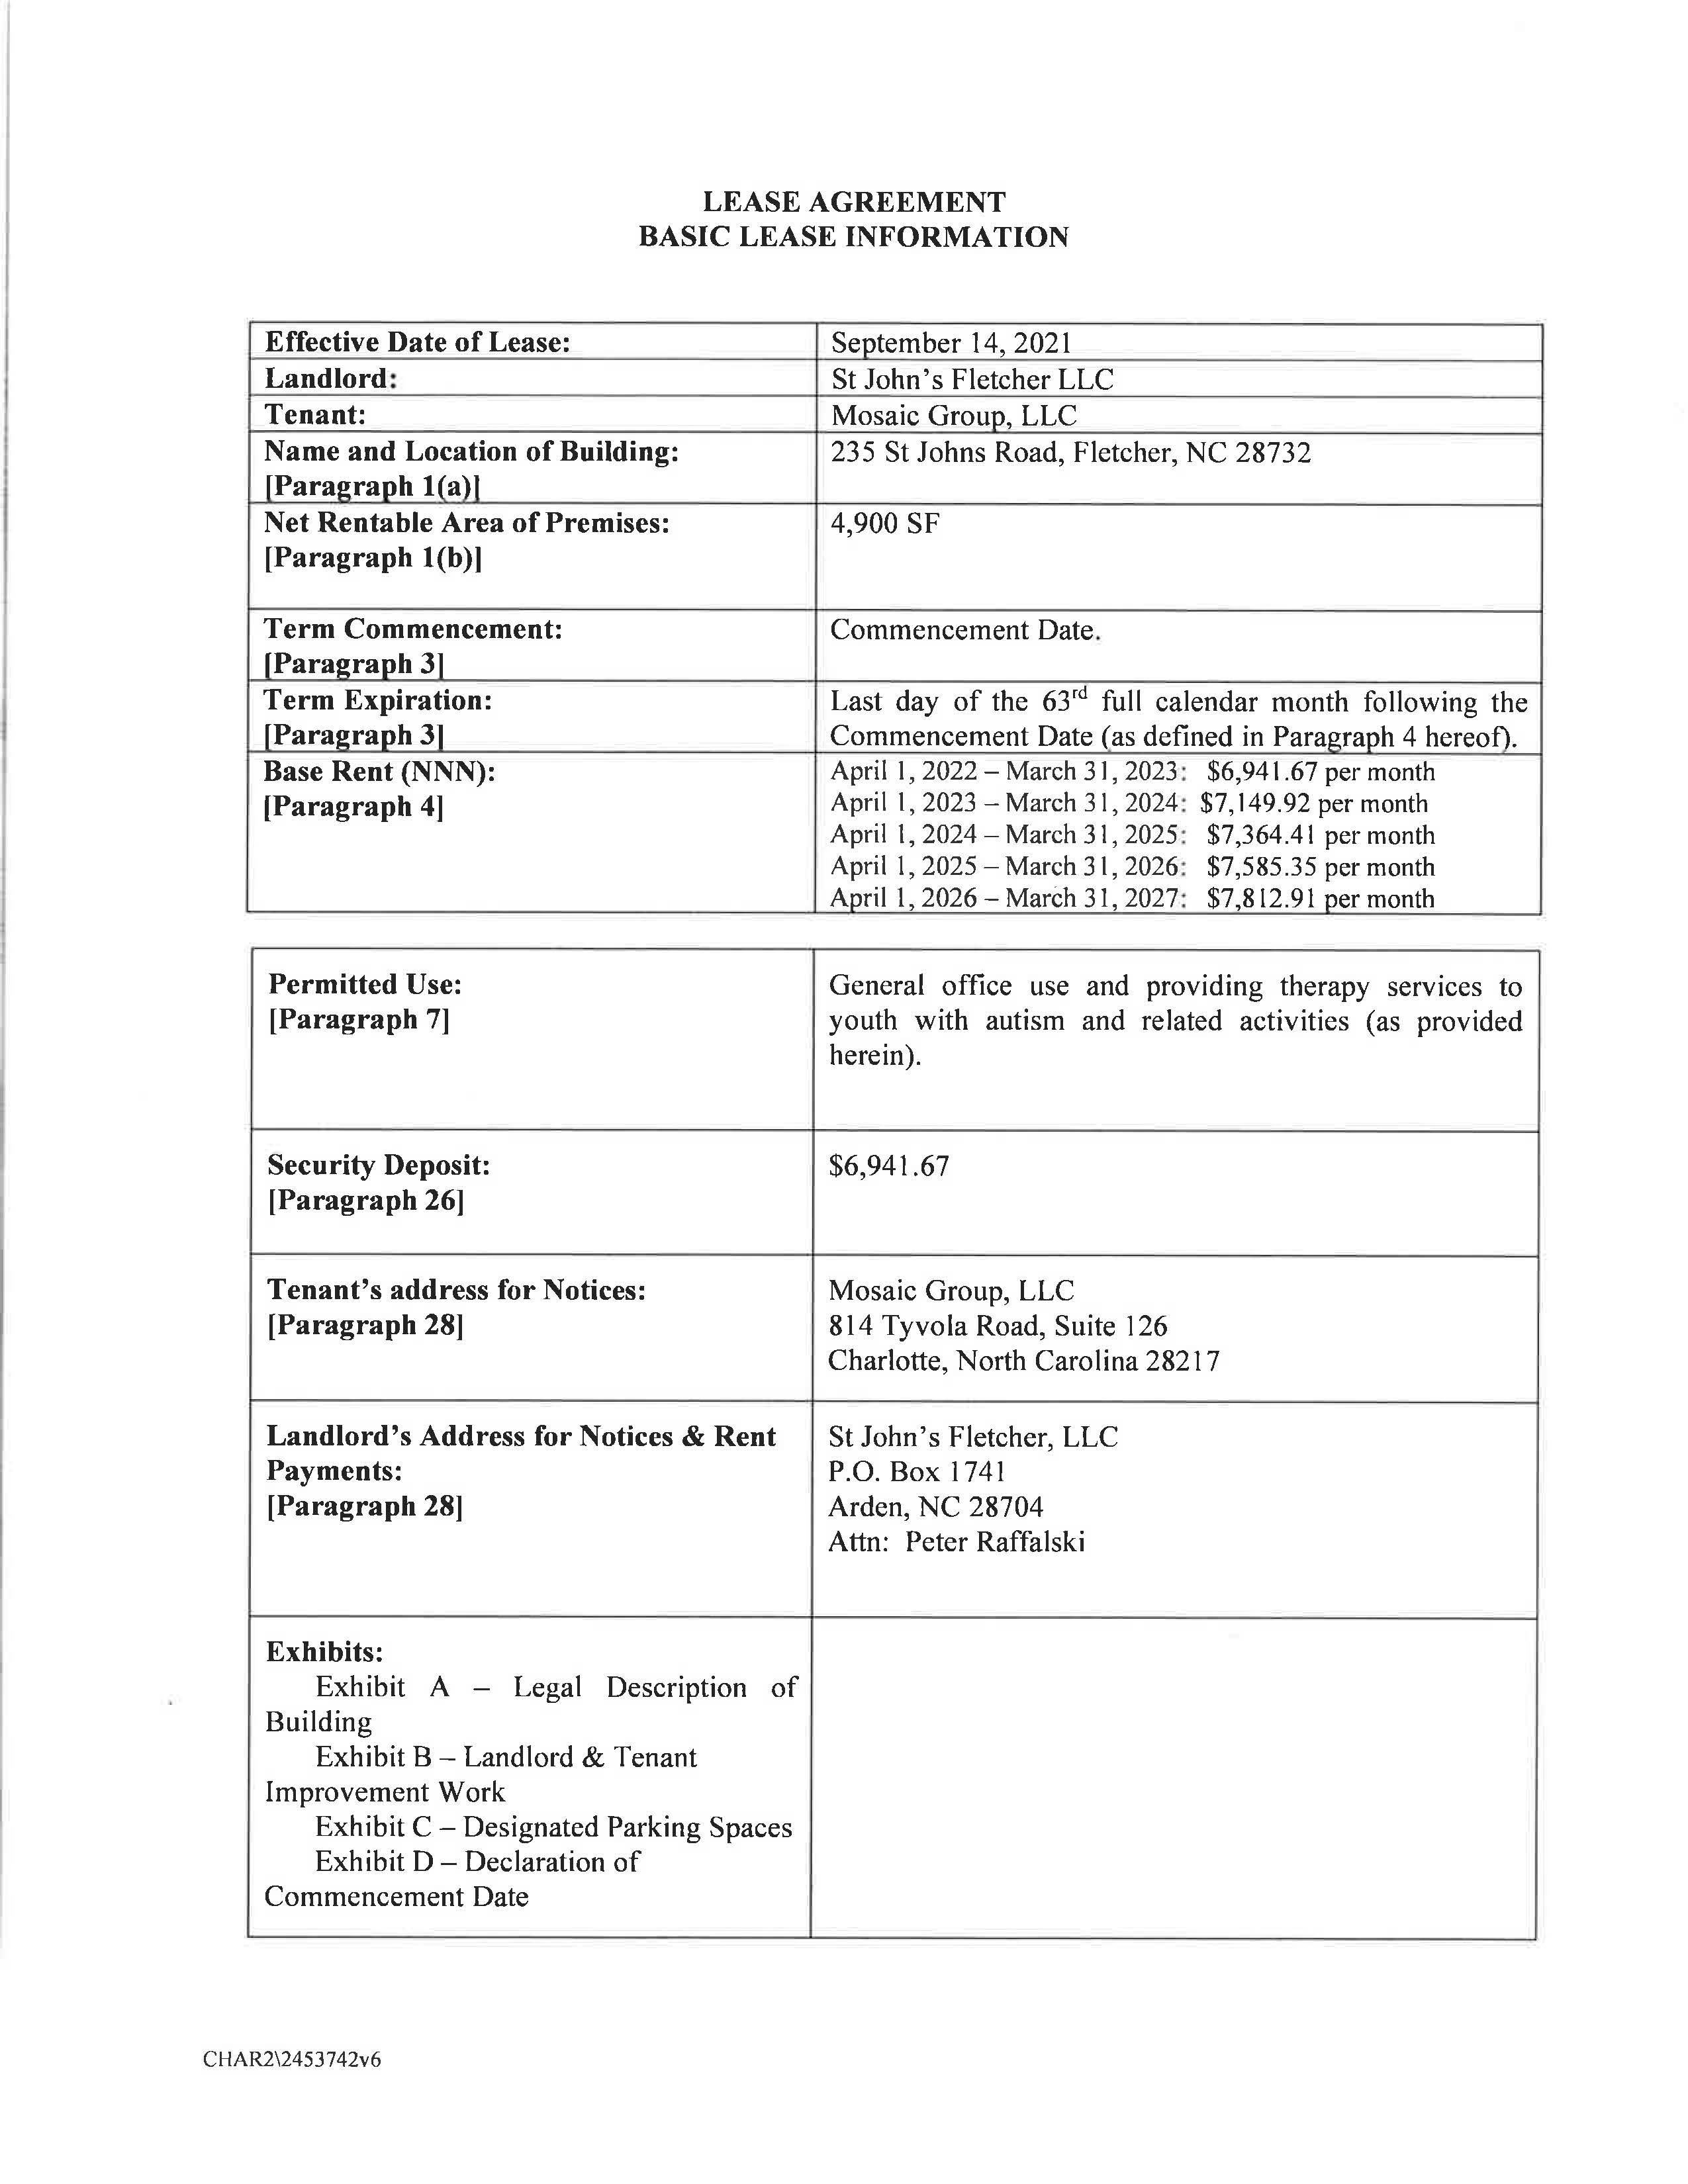

In [82]:
im

In [83]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [84]:
ocr_result = pytesseract.image_to_string(im)
print(ocr_result)

LEASE AGREEMENT
BASIC LEASE INFORMATION

Effective Date of Lease:

September 14, 2021

Landlord:
Tenant:

| St John’s Fletcher LLC

Mosaic Group, LLC

Name and Location of Building:
Paragraph l(a

235 St Johns Road, Fletcher,

Net Rentable Area of Premises:
[Paragraph 1(b)]

4,900 SF

NC 28732

Term Commencement:

[Paragraph 3]

Commencement Date.

Term Expiration:
Paragraph 3

Last day of the 63" full calendar month following the
Commencement Date (as defined in Paragraph 4 hereof).

Base Rent (NNN):
[Paragraph 4]

April 1, 2022 — March 31, 2023
April 1, 2023 — March 31, 2024

April 1, 2024 — March 31, 2025:

April 1, 2025 — March 31, 2026
April 1, 2026 — March 31, 2027

Permitted Use:
[Paragraph 7]

: $6,941.67 per month
: $7,149.92 per month

$7,364.41 per month
: $7,585.35 per month
:_ $7,812.91 per month

General office use and providing therapy services to
youth with autism and related activities (as provided
herein).

Security Deposit:
[Paragraph 26]

Tenant’s address for Notice

In [85]:
def preprocess(image):
    image = np.array(image)
    # Check if the image is not grayscale
    if len(image.shape) == 3 and image.shape[2] == 3:
        # grayscale conversion
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Gausian blur
    image = cv2.GaussianBlur(image, (1, 3), 0)
    # binarization
    _, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return image

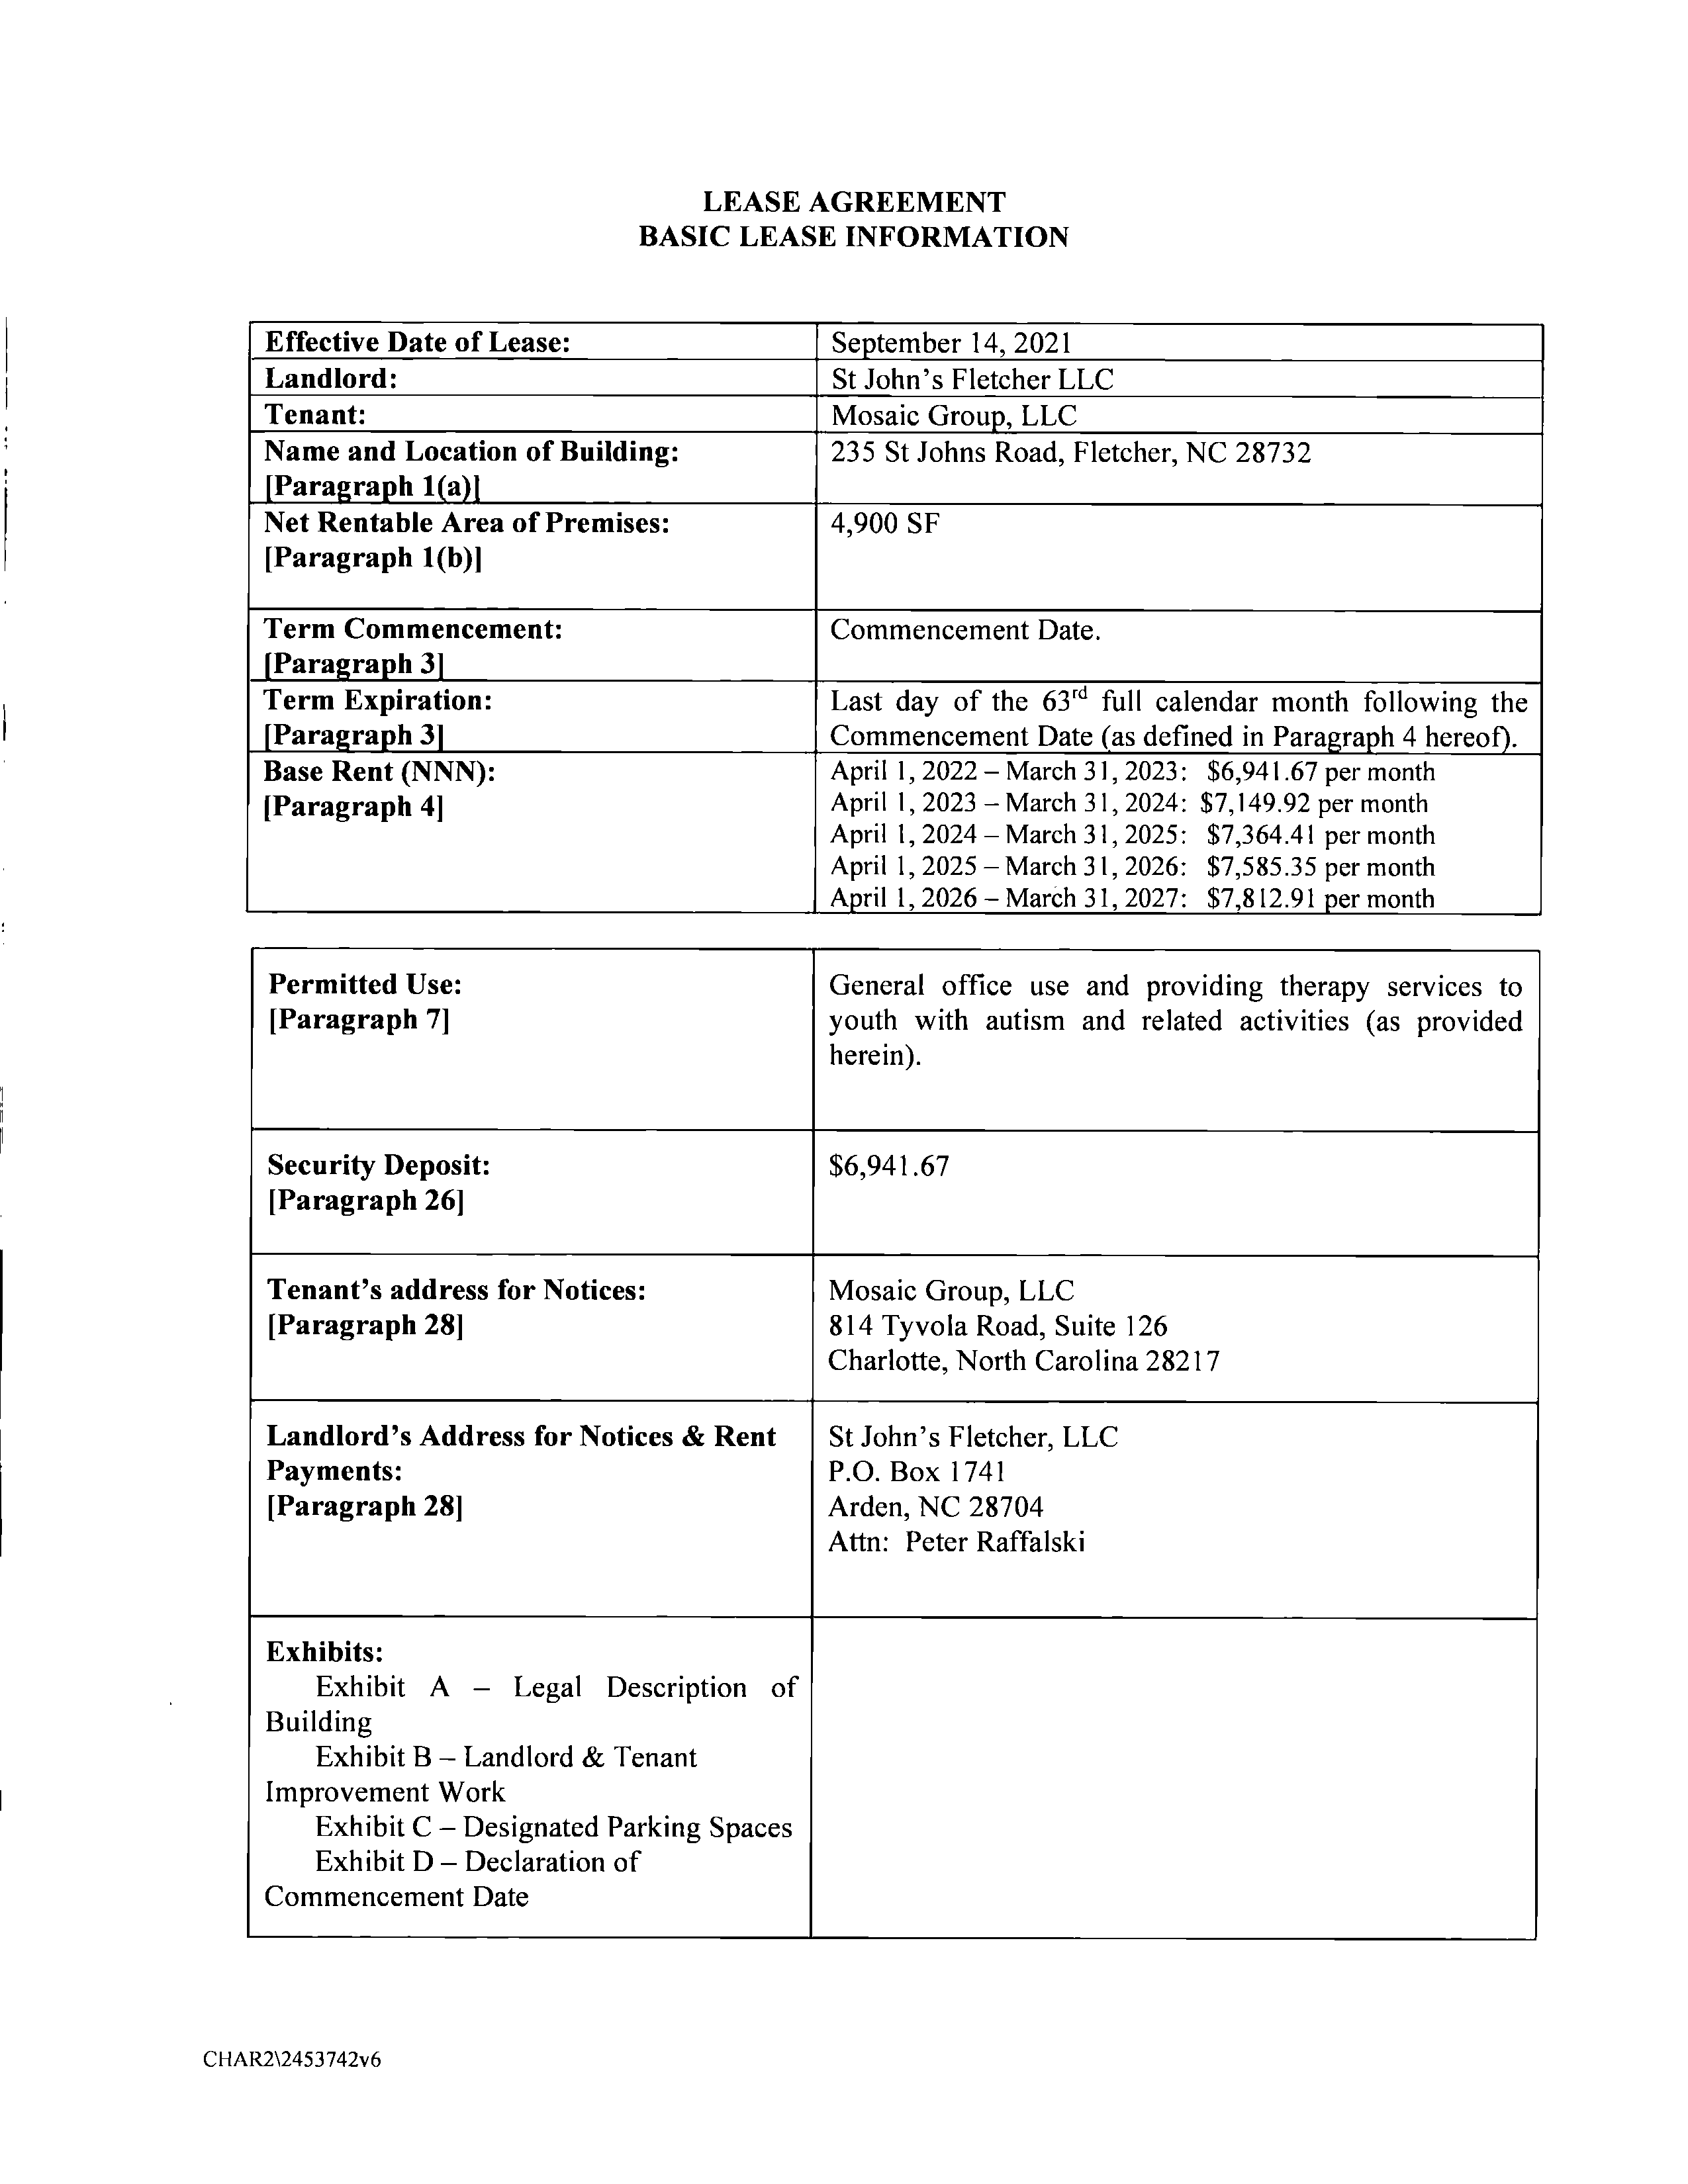

In [86]:
im = preprocess(im)
if len(im.shape) == 2:
    # Grayscale image
    im = Image.fromarray(im)
else:
    # Color image
    im = Image.fromarray(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
im

In [87]:
ocr_result = pytesseract.image_to_string(im)

In [88]:
print(ocr_result)

|

LEASE AGREEMENT
BASIC LEASE INFORMATION

Effective Date of Lease: September 14, 2021
Landlord: St John’s Fletcher LLC
Tenant: Mosaic Group, LLC

Name and Location of Building: 235 St Johns Road, Fletcher, NC 28732
Paragraph l(a

Net Rentable Area of Premises: 4,900 SF
[Paragraph 1(b)]

Last day of the 63" full calendar month following the
g Commencement Date (as defined in Paragraph 4 hereof).
Base Rent (NNN): April 1, 2022 — March 31, 2023: $6,941.67 per month
[Paragraph 4] April 1, 2023 — March 31, 2024: $7,149.92 per month
April 1, 2024 — March 31, 2025: $7,364.41 per month
April 1, 2025 — March 31, 2026: $7,585.35 per month
April 1, 2026 — March 31, 2027: $7,812.91 per month

Permitted Use: General office use and providing therapy services to
[Paragraph 7] youth with autism and related activities (as provided
herein).

Security Deposit: $6,941.67
[Paragraph 26]

Tenant’s address for Notices: Mosaic Group, LLC
[Paragraph 28] 814 Tyvola Road, Suite 126
Charlotte, North Carolina 28

In [89]:
# OCR extraction for an entire pdf

In [90]:
images = convert_from_path("C:/Users/RECAM/ASH - St Johns Mosaic Lease - 09142021 (signed).pdf")

In [91]:
ocr_results = []

In [92]:
for i, image in enumerate(images, start=1):
    print(f"Processing page {i}...")
    def preprocessing(image):
        image = np.array(image)
        # Check if the image is not grayscale
        if len(image.shape) == 3 and image.shape[2] == 3:
            # grayscale conversion
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Gausian blur
        image = cv2.GaussianBlur(image, (3, 5), 0)
        # binarization
        _, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        return image
    processed_image = preprocessing(image)
    ocr_result = pytesseract.image_to_string(processed_image)
    ocr_results.append(ocr_result)

Processing page 1...
Processing page 2...
Processing page 3...
Processing page 4...
Processing page 5...
Processing page 6...
Processing page 7...
Processing page 8...
Processing page 9...
Processing page 10...
Processing page 11...
Processing page 12...
Processing page 13...
Processing page 14...
Processing page 15...
Processing page 16...
Processing page 17...
Processing page 18...
Processing page 19...
Processing page 20...
Processing page 21...
Processing page 22...


In [93]:
print(ocr_results[0])

LEASE AGREEMENT
BASIC LEASE INFORMATION

Effective Date of Lease: September 14, 2021
Landlord: St John’s Fletcher LLC
Tenant: Mosaic Group, LLC

Name and Location of Building: 235 St Johns Road, Fletcher, NC 28732
Paragraph l(a

Net Rentable Area of Premises: 4,900 SF

[Paragraph 1(b)|

Term Commencement: Commencement Date.
Paragraph 3

Term Expiration: Last day of the 63° full calendar month following the
Paragraph 3 Commencement Date (as defined in Paragraph 4 hereof).
Base Rent (NNN): April 1, 2022 — March 31, 2023: $6,941.67 per month
[Paragraph 4] April 1, 2023 — March 31, 2024: $7,149.92 per month
April 1, 2024 — March 31, 2025: $7,364.41 per month
April 1, 2025 — March 31, 2026: $7,585.35 per month
April |, 2026 - March 31, 2027: $7,812.91 per month

Permitted Use: General office use and providing therapy services to
[Paragraph 7] youth with autism and related activities (as provided
herein).

Security Deposit: $6,941.67
[Paragraph 26]

Tenant’s address for Notices: Mosaic Group

In [94]:
print(ocr_results[1])

The provisions of the Lease identified above in brackets are those provisions where reference to
particular Basic Lease Information appears. Each reference to an item of Basic Lease Information,
wherever it may appear in the Lease, shall incorporate the applicable Basic Lease Information set
forth above. In the event of any conflict between any Basic Lease Information and the Lease, the
latter shall control.

CHAR2\2453742v6



In [95]:
print(ocr_results[2])

LEASE AGREEMENT

THIS LEASE AGREEMENT (this “Lease”), dated September 14, 2021 (the “Effective Date”), is
made and entered into by and between St John’s Fletcher LLC, a North Carolina limited liability
company (“Landlord”) and Mosaic Group, LLC, a South Carolina limited liability company (“Tenant”).

WITNESSETH:

Landlord hereby leases to Tenant, and Tenant hereby leases from Landlord the Premises
described in paragraph 1(b) below for the term and subject to the terms, covenants, agreements and
conditions hercinafter set forth, to each and al! of which Landlord and Tenant hereby mutually agrce.

I. Definitions. Unless the context otherwise specified or requires, the following terms shall have the
meanings herein specified:

(a) The term “Building” shall mean the parcel of real property described on Exhibit A
attached hereto, situated in the location and commonly known by the name specified in the Basic lease
Information, which name the Landlord may change at any time, and all other imp

In [96]:
print(ocr_results[3])

real estate taxes); franchisc, margin, use, transaction, business activity or privilege tax imposed by
Landlord, or (z) “tap-in” or other development fees specific to the initial construction of the Building.

(f) The term “Rent” or “Rental” shall mean all payments due from Tenant to Landlord;
including, but not limited to, Base Rent and all other additional rent, as provided in this Lease.

2. Premises. Tenant hereby acknowledges that, except as otherwise expressly sct forth herein, the
Premises shall be delivered in “as is” condition and that Landlord otherwise has no obligation to alter,
repair, renovate, or render fit for Tenant’s occupancy, any part of the Premiscs. Landlord represents and
warrants that, as of the Effective Date and as of the Commencement Date (defined in Section 4(a) below),
as applicable, (a) the mechanical systems and utilitics serving the Premises are and will be in good
working order and the Premises and the Building arc and will be in compliance with all iss

In [97]:
print(ocr_results[4])

(b) Commencing on the Rent Commencement Date, Tenant shall pay, as additional rent, all other
sums of money or charges required to be paid by Tenant hereunder in addition to Base Rent, whether or
not the same are designated “additional rent.” All additional rent shall be payable within ten (10) days of
receipt of Landlord’s written invoice therefor. Tenant shall pay a late charge cqual to five (5%) of any
instance of Rent or other charges duc undcr this lease when paid more than five (5) days after the due date
thereof. This charge shall be added to the amount then due and shall immediately be due and payable.

5. Taxes, Insurance and Common Area. Landlord shall pay all Property Taxes on the Property, shall
procure and pay for all Insurance (as hereinafter defined) with respect to the Property, and shall maintain
and operate the Common Areas of the Property. Commencing on the Rent Commencement Date, ‘Tenant
shaJl reimburse Landlord for its Proportionate Share of Property Taxes, Insuran

In [98]:
print(ocr_results[5])

have delivered to Tenant the statement for the estimated Common Area Expenses for the then current
calendar year, Tenant shall pay to Landlord the product of one-twelfth (1/12) of Tenant’s Proportionate
Share of the estimated Common Area Expenses for the then current calendar year multiplicd by the
number of calendar months in the calendar year which shall have begun as of said first day, minus the
aggregate amount of the monthly payments for Tenant’s Proportionate Share of cxpenses theretofore paid
by Tenant during such calendar year. The remainder of Tenant’s Proportionate Share of such expenses for
the then current calendar year shall be paid by Tenant to Landlord on the first day of each succeeding
month in equal consecutive monthly installments of onc-twelfth (1/12) of the total amount of Tenant’s
Proportionate Share of Common Arca Expenses as shown on the estimate thereof provided by Landlord.

The term “Common Area Expenses” shall mean and include the total cost and expense paid

In [99]:
print(ocr_results[15])

25. Parking. Tenant, its employccs, agents, customers and invitees shall be entitled to use the parking
spaces in the Common Areas as designated on Exhibit C attached hereto and incorporated herein by this
reference, including (a) a minimum of 89 parking spaccs for the 23,688 sq.ft. shopping center, and such
parking shall be available to l'cnant at all times at a ratio of not less than 3.75 spaces per 1,000 square feet
in the Premises, and (b) four (4) spaces which shall be reserved and marked by I.andlord for Tenant’s
exclusive use. Landlord agrees to install signage indicating the four (4) reserved spaces by no later than
the Commencement Date. Landlord shall maintain the Parking serving the Premiscs and the Building at
Landlord’s sole cost and expense.

26. Security Deposit. Tenant has deposited with Landlord the sum specified in the Basic Lease
Information (the “Deposit”). The Deposit shall be held by Landlord as security for the faithful
performance by Tenant of all of the provisi

In [78]:
print(ocr_results[20])

St Ow 5 Michetpiece:
9 Paring Soaces

CHAR2\2453742v6

EXHIBIT C

Parking Spaces

21



In [79]:
print(ocr_results[22])

LEASE AGREEMENT
BASIC LEASE INFORMATION

Effective Date of Lease: September 14, 2021
Landlord: St John’s Fletcher LLC
Tenant: Mosaic Group, LLC

Name and Location of Building: 235 St Johns Road, Fletcher, NC 28732
Paragraph l(a

Net Rentable Area of Premises: 4,900 SF

[Paragraph 1(b)|

Term Commencement: Commencement Date.
Paragraph 3

Term Expiration: Last day of the 63° full calendar month following the
Paragraph 3 Commencement Date (as defined in Paragraph 4 hereof).
Base Rent (NNN): April 1, 2022 — March 31, 2023: $6,941.67 per month
[Paragraph 4] April 1, 2023 — March 31, 2024: $7,149.92 per month
April 1, 2024 — March 31, 2025: $7,364.41 per month
April 1, 2025 — March 31, 2026: $7,585.35 per month
April |, 2026 - March 31, 2027: $7,812.91 per month

Permitted Use: General office use and providing therapy services to
[Paragraph 7] youth with autism and related activities (as provided
herein).

Security Deposit: $6,941.67
[Paragraph 26]

Tenant’s address for Notices: Mosaic Group